# Welcome do my first Exploratory Data Analysis!
Author: Barbara dos Santos Port - 6o ADS

Downloading the dataset:

Obs.: all commands that starts with **!** are from the Operational System



## Downloading and preparing the dataset

Removing old folders to reset the environment and everything runs perfectly:

In [ ]:
!rm -rf cats_and_dogs_filtered/
!rm -rf sample_data/

Downloading the dataset:

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-11 20:51:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.65.80, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   174MB/s    in 0.4s    

2022-09-11 20:51:00 (174 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Unzipping the dataset:

In [ ]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

Removing all zip files (because they are unused):

In [ ]:
!rm -rf *.zip*

In [ ]:
!ls

cats_and_dogs_filtered


## Importing the necessary libraries

Installing Tensorflow:

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

## Organizing the images folder variables to use in the notebook

In [ ]:
dataset_folder = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')
dataset_train_folder = os.path.join(dataset_folder, 'train')
dataset_validation_folder = os.path.join(dataset_folder, 'validation')

Checking the quantity of images from cats and from dogs

In [ ]:
dataset_train_cats_folder_len = len(os.listdir(os.path.join(dataset_train_folder, 'cats')))
dataset_validation_cats_folder_len = len(os.listdir(os.path.join(dataset_validation_folder, 'cats')))
dataset_train_dogs_folder_len = len(os.listdir(os.path.join(dataset_train_folder, 'dogs')))
dataset_validation_dogs_folder_len = len(os.listdir(os.path.join(dataset_validation_folder, 'dogs')))

print('Train cats: %s' % dataset_train_cats_folder_len)
print('Train dogs: %s' % dataset_train_dogs_folder_len)
print('Validation cats: %s' % dataset_validation_cats_folder_len)
print('Validation dogs: %s' % dataset_validation_dogs_folder_len)

Train cats: 1000
Train dogs: 1000
Validation cats: 500
Validation dogs: 500


Configuring images shape:

In [ ]:
image_height = 160
image_width = 160

image_color_channel = 3
image_color_channel_size = 255

image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel, )

batch_size = 32 # amount of times that i will get the features from the dataset
epochs = 20 # amount of times that i will pass by the entire dataset
learning_rate = 0.0001 # learning rate

classes_names = ['cat', 'dog']

Creating datasets for training and for validating:

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_folder,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_folder,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


Test dataset:

In [ ]:
validation_dataset_cardinality = tf.data.experimental.cardinality(validation_dataset) # cardinality: tamanho do dataset
validation_dataset_batches = validation_dataset_cardinality // 5

test_dataset = validation_dataset.take(validation_dataset_batches)
validation_dataset = validation_dataset.skip(validation_dataset_batches)

print("Validation dataset cardinality: %d" % validation_dataset_cardinality)
print("Test dataset cardinality: %d" % tf.data.experimental.cardinality(test_dataset))

Validation dataset cardinality: 32
Test dataset cardinality: 6


Some images from the datasets:

In [ ]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(classes_names[labels[i]])

<Figure size 432x288 with 0 Axes>

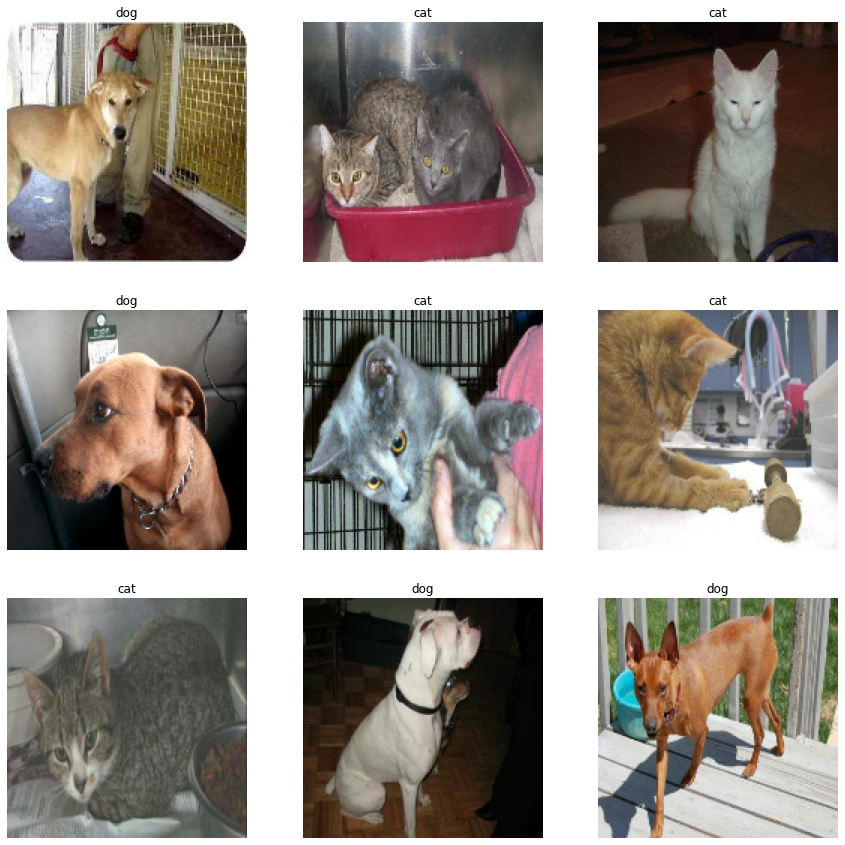

In [ ]:
plot_dataset(train_dataset)

<Figure size 432x288 with 0 Axes>

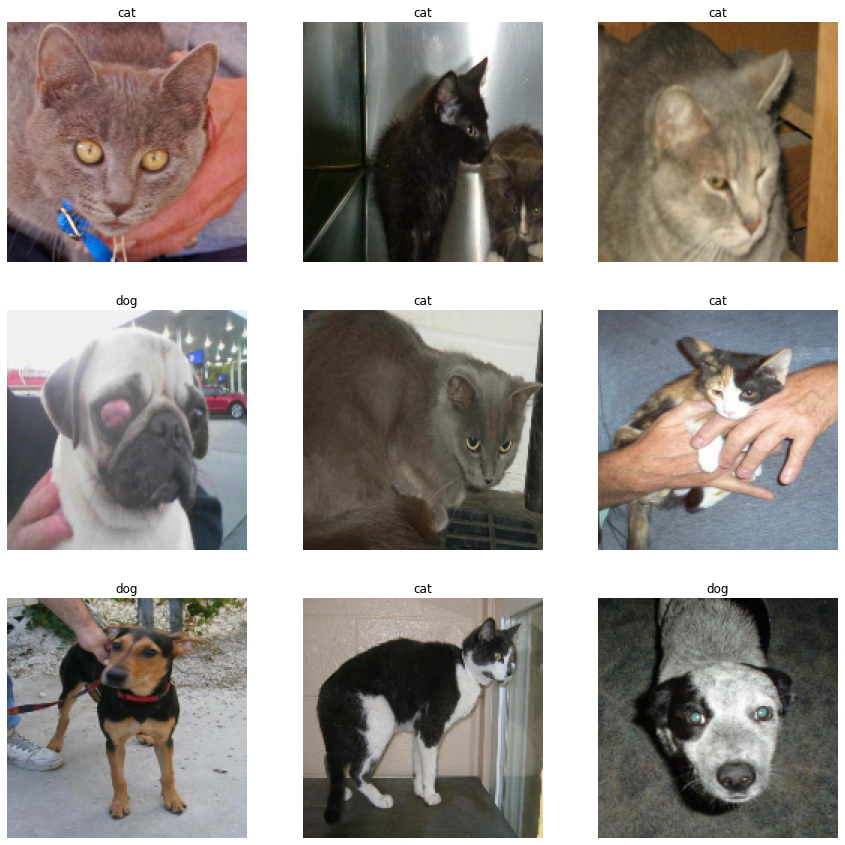

In [ ]:
plot_dataset(validation_dataset)

## Creating more examples by zooming and rotating images

In [ ]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [ ]:
def plot_dataset_data_augmentation(dataset):
  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for features, _ in dataset.take(1):
    feature = features[0]

    for i in range(9):
      feature_data_aumentation = data_augmentation(tf.expand_dims(feature, 0))

      plt.subplot(3, 3, i + 1)
      plt.axis("off")

      plt.imshow(feature_data_aumentation[0] / image_color_channel_size)

<Figure size 432x288 with 0 Axes>

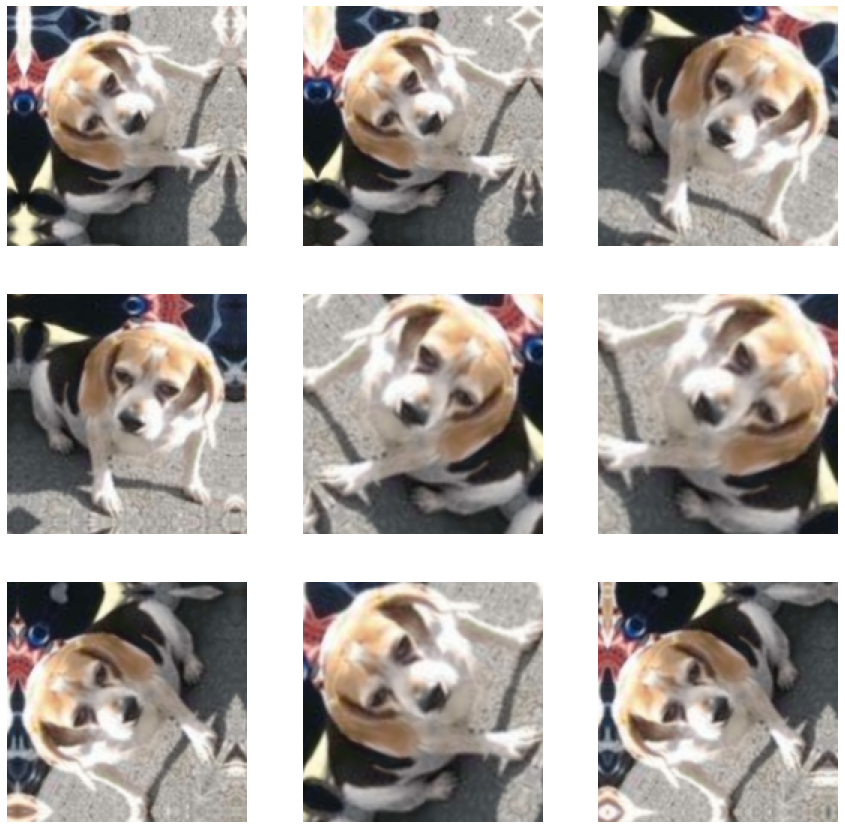

In [ ]:
plot_dataset_data_augmentation(train_dataset)

In [ ]:
model_transfer_learning = tf.keras.applications.MobileNetV2(
    input_shape = image_shape,
    include_top = False,
    weights = "imagenet"
) # transfer learning

model_transfer_learning.trainable = False # to don't update the parameters
model_transfer_learning.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling( # rescale the images
        1. / (image_color_channel_size / 2), # normalization
        offset = -1,
        input_shape = image_shape
    ),
    
    # tf.keras.layers.Conv2D(32 , 3, padding = "same", activation = "relu"), # 16 times, 3x3 kernel,  0 in the feature and negative values turns into zero
    # tf.keras.layers.MaxPooling2D(), # consolidades the convolutional layer
    # tf.keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(128, 3, padding = "same", activation = "relu"),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Flatten(), # squashes the layers
    # tf.keras.layers.Dense(256, activation = "relu"),

    data_augmentation, # using the examples with zoom and rotation
    model_transfer_learning, # using transfer learning
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = "sigmoid") # 1 output between -1 and 1
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
) # training model

Epoch 1/20
63/63 [==============================] - 39s 573ms/step - loss: 0.3151 - accuracy: 0.5355 - val_loss: 0.1968 - val_accuracy: 0.6485
Epoch 2/20
63/63 [==============================] - 31s 493ms/step - loss: 0.2236 - accuracy: 0.6665 - val_loss: 0.1255 - val_accuracy: 0.7772
Epoch 3/20
63/63 [==============================] - 32s 510ms/step - loss: 0.1663 - accuracy: 0.7475 - val_loss: 0.0883 - val_accuracy: 0.8552
Epoch 4/20
63/63 [==============================] - 32s 500ms/step - loss: 0.1364 - accuracy: 0.7930 - val_loss: 0.0717 - val_accuracy: 0.8911
Epoch 5/20
63/63 [==============================] - 31s 499ms/step - loss: 0.1187 - accuracy: 0.8255 - val_loss: 0.0619 - val_accuracy: 0.9084
Epoch 6/20
63/63 [==============================] - 32s 500ms/step - loss: 0.1088 - accuracy: 0.8420 - val_loss: 0.0535 - val_accuracy: 0.9282
Epoch 7/20
63/63 [==============================] - 32s 500ms/step - loss: 0.0983 - accuracy: 0.8505 - val_loss: 0.0458 - val_accuracy: 0.9394

In [ ]:
def plot_dataset_predictions(dataset):
  features, labels = dataset.as_numpy_iterator().next()

  predictions = model.predict_on_batch(features).flatten()
  predictions = tf.where(predictions < 0.5, 0, 1)

  print("Labels:      %s" % labels)
  print("Predictions: %s" % predictions.numpy())

  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')

    plt.imshow(features[i].astype("uint8"))
    plt.title(classes_names[predictions[i]])

In [ ]:
def plot_model():
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs_range = range(epochs)

  plt.gcf().clear()
  plt.figure(figsize = (15, 8))

  plt.subplot(1, 2, 1)
  plt.title("Training and validation accuracy")
  plt.plot(epochs_range, accuracy, label = "Training Accuracy")
  plt.plot(epochs_range, val_accuracy, label = "Validation Accuracy")
  plt.legend(loc = "lower right")

  plt.subplot(1, 2, 2)
  plt.title("Training and validation loss")
  plt.plot(epochs_range, loss, label = "Training Loss")
  plt.plot(epochs_range, val_loss, label = "Validation Loss")
  plt.legend(loc = "lower right")

  plt.show()

<Figure size 432x288 with 0 Axes>

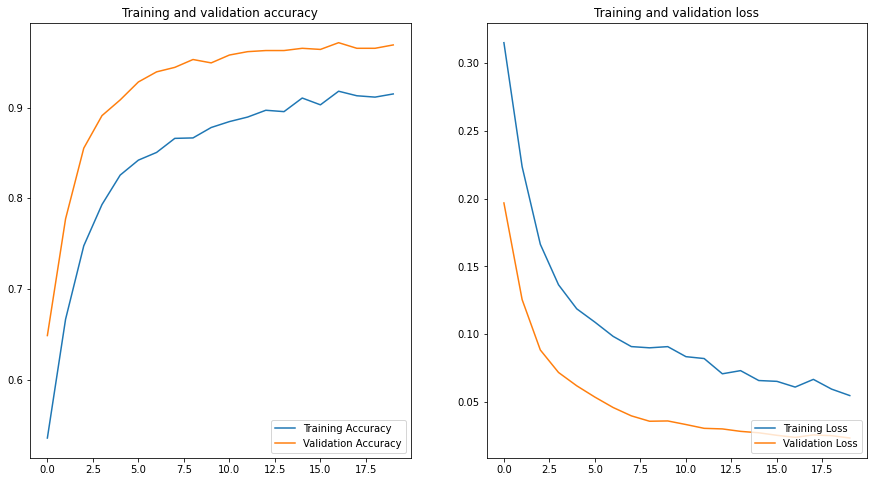

In [ ]:
plot_model()

Labels:      [1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1]
Predictions: [0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1]


<Figure size 432x288 with 0 Axes>

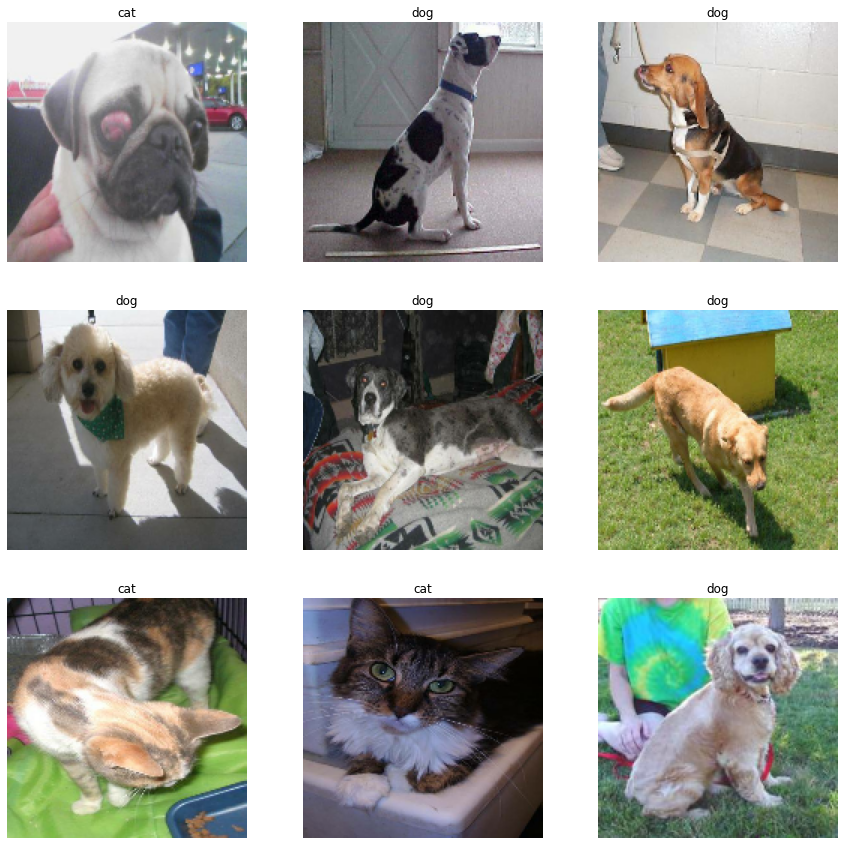

In [ ]:
plot_dataset_predictions(test_dataset)

Above we had just one error!

Labels:      [1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1]
Predictions: [1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1]


<Figure size 432x288 with 0 Axes>

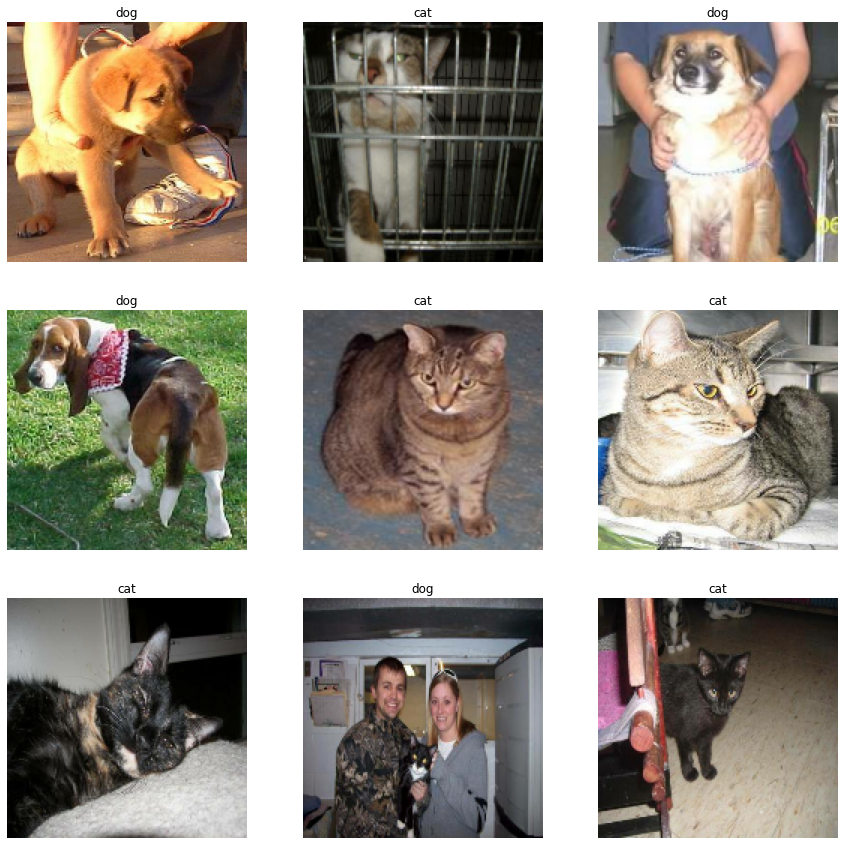

In [ ]:
plot_dataset_predictions(test_dataset)

Above we had one error!

Labels:      [1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0]
Predictions: [1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

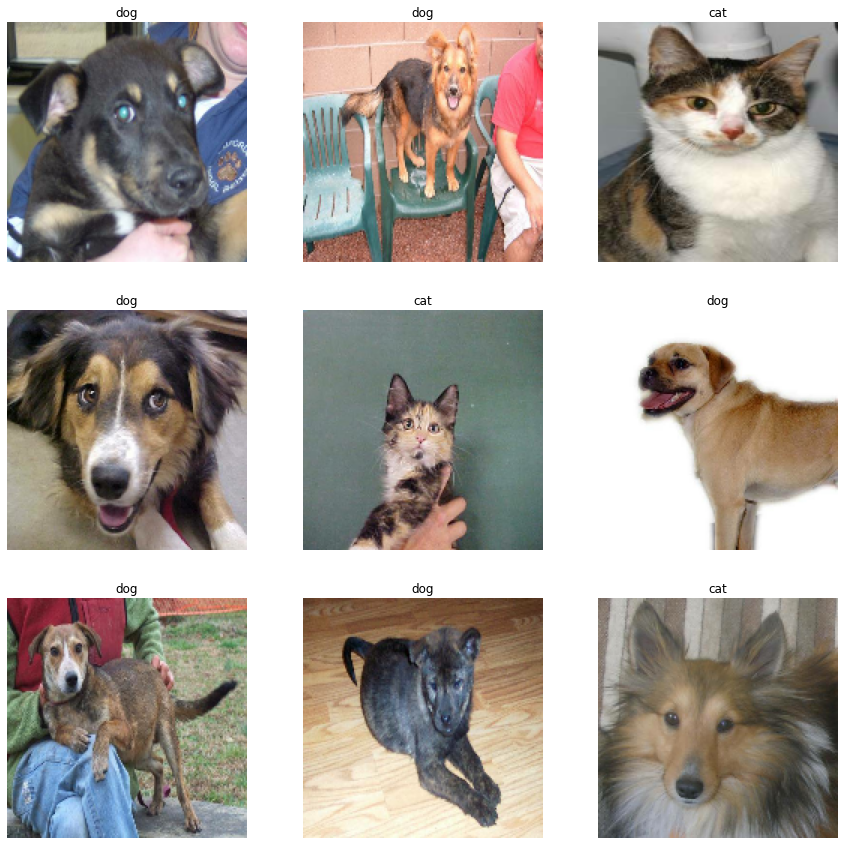

In [ ]:
plot_dataset_predictions(test_dataset)

Above we had two errors!

In [ ]:
model.save(dataset_folder) # saves the model

In [ ]:
model = tf.keras.models.load_model(dataset_folder) # loads the model to use